In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn import metrics

<h1> part 1 from email </h1>
<h2> determine which features contribute to the components </h2>

In [9]:
# Data import
df=pd.read_csv('atussum_1921-reduced.csv')


In [10]:
# Create feature list and target
features = []
for i in range(1,17):
    features.append('t%02d'%i)

features.append('t18')
features.append('t50')

target = ['TESEX']

In [12]:
# Data preprocessing
# rows for 2019
df_19 = df[df['TUYEAR'] == 2019]
# rows for 2021
df_21 = df[df['TUYEAR'] == 2021]

# selecting cols that only contains the feature
x_19 = df_19.loc[:, features]
x_21 = df_21.loc[:, features]
# normaliza x data returned nparray
x_19_scaled = StandardScaler().fit_transform(x_19.values)
x_21_scaled = StandardScaler().fit_transform(x_21.values)
# reassemble nparray back to dataframe
x_19_df = pd.DataFrame(x_19_scaled,index=x_19.index, columns=x_19.columns)
x_21_df = pd.DataFrame(x_21_scaled,index=x_21.index, columns=x_21.columns)

# selecting target TODO 
y = df.loc[:,target].values

# Deleting original df because we don't need it anymore
del df

In [13]:
# Perfrom pca
pca = PCA(n_components=2)
pca_2 = PCA(n_components=2)

# 2019
pca_19 = pca.fit_transform(x_19)
print(pca.explained_variance_ratio_)
pca_19_df = pd.DataFrame(data = pca_19
             , columns = ['principal component 1', 'principal component 2'])
# 2021
pca_21 = pca_2.fit_transform(x_21)
print(pca_2.explained_variance_ratio_)
pca_21_df = pd.DataFrame(data = pca_21
             , columns = ['principal component 1', 'principal component 2'])

[0.43633019 0.21009205]
[0.44347902 0.2161825 ]


In [14]:
# Analysis results from pca
dataset_pca_19 = pd.DataFrame(abs(pca.components_),columns=x_19_df.columns,index=['PC_1', 'PC_2'])
dataset_pca_21 = pd.DataFrame(abs(pca_2.components_),columns=x_21_df.columns,index=['PC_1', 'PC_2'])

In [15]:
pca_19_df

,principal component 1,principal component 2
0,-188.953607,18.203590
1,-462.199757,386.719582
2,183.803380,121.937691
3,50.718088,-195.398794
4,-208.311944,223.260850
...,...,...
9430,-174.369708,-115.346634
9431,-198.976144,-29.336745
9432,-22.578343,-130.283495
9433,382.125822,28.195913


<h2> year 2019 </h2>

In [16]:
# Filter out the feature has higher impact to the component with threshold 0.3
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca_19[dataset_pca_19 > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca_19[dataset_pca_19 > 0.3].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 t05    0.767699
t12    0.625132
Name: PC_1, dtype: float64


As per PC 2:
 t01    0.356535
t02    0.411126
t05    0.470627
t12    0.681885
Name: PC_2, dtype: float64

******************************************************************


<h2> year 2021 </h2>

In [17]:
# Filter out the feature has higher impact to the component with threshold 0.3
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca_21[dataset_pca_21 > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca_21[dataset_pca_21 > 0.3].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 t05    0.773376
t12    0.620138
Name: PC_1, dtype: float64


As per PC 2:
 t01    0.301223
t02    0.472248
t05    0.460071
t12    0.676540
Name: PC_2, dtype: float64

******************************************************************


Selecting no of clusters based on silhoutte score method 

In [18]:
def get_optimum_n_clusters(data):
  n_clusters_candidates = [3,4,5,6,7,8,9,10,12,15,20]
  parameter_grid = ParameterGrid({'n_clusters': n_clusters_candidates})

  kmeans_model = KMeans() 
  silhouette_scores = []
  best_score = -1

  for p in parameter_grid:
    kmeans_model.set_params(**p)
    kmeans_model.fit(data)

    ss = metrics.silhouette_score(data, kmeans_model.labels_)
    silhouette_scores += [ss]

    if ss > best_score:
      best_score = ss
      best_grid = p

  return best_grid['n_clusters']

optimum_clusters_19 = get_optimum_n_clusters(pca_19_df)
optimum_clusters_21 = get_optimum_n_clusters(pca_21_df)

Applying K-means 

In [66]:
# Applyting k means to 2019 data 
# kmeans_19 = KMeans(n_clusters=optimum_clusters_19)
# kmeans_19.fit(pca_19_df)

#Applying k means to 2021 data 
# kmeans_21 = KMeans(n_clusters=optimum_clusters_21)
# kmeans_21.fit(pca_21_df)
# kmeans_21.labels_

array([1, 0, 1, ..., 2, 0, 1], dtype=int32)

Adding K-means labels to df_19 and df_21 for visualizations 

In [20]:
df_19.loc[:, 'cluster_labels'] = kmeans_19.labels_
df_21.loc[:, 'cluster_labels'] = kmeans_21.labels_
df_19.loc[:, 'pc1'] = pca_19_df['principal component 1']
df_19.loc[:, 'pc2'] = pca_19_df['principal component 2']
df_21.loc[:, 'pc1'] = pca_21_df['principal component 1']
df_21.loc[:, 'pc2'] = pca_21_df['principal component 2']


In [62]:
kmeans_21.labels_

array([1, 2, 1, ..., 0, 2, 1], dtype=int32)

In [21]:
df_19

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t12,t13,t14,t15,t16,t18,t50,cluster_labels,pc1,pc2
0,20190101190022,-1,1,40,2,2,85,5,-1,-1,...,420,0,240,0,0,60,0,2,-188.953607,18.203590
1,20190101190031,-1,1,37,1,1,25,1,2,2,...,877,0,0,0,0,0,0,2,-462.199757,386.719582
2,20190101190057,-1,1,40,1,1,20,1,2,2,...,300,0,0,0,10,0,0,1,183.803380,121.937691
3,20190101190107,-1,1,42,1,1,61,4,-1,-1,...,100,0,0,0,0,187,0,0,50.718088,-195.398794
4,20190101190555,-1,2,43,2,1,34,1,2,2,...,580,0,0,0,0,50,0,2,-208.311944,223.260850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,20191212192229,-1,1,41,2,1,66,1,2,-1,...,365,0,0,0,10,0,85,0,-174.369708,-115.346634
9431,20191212192255,-1,2,43,2,1,41,1,2,2,...,425,0,0,0,0,100,0,0,-198.976144,-29.336745
9432,20191212192256,-1,1,43,2,1,75,1,2,-1,...,200,0,0,0,0,145,0,0,-22.578343,-130.283495
9433,20191212192265,-1,1,44,2,1,56,1,2,-1,...,110,0,0,0,0,105,0,1,382.125822,28.195913


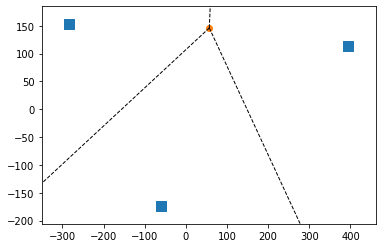

In [ ]:
# Draw voronoi 2d
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

centers_19 = kmeans_19.cluster_centers_
plt.scatter(centers_19[:,0],centers_19[:,1], marker='s', s=100)


vor = Voronoi(centers_19)
fig = voronoi_plot_2d(vor,plt.gca())

plt.show()

<h2> cluster plot for 2019 t05 agains t12 </h2>

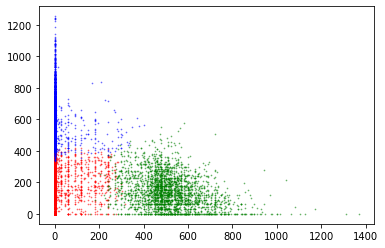

In [52]:
plt.cla
cluster0 = df_19[df_19['cluster_labels']==0]
cluster1 = df_19[df_19['cluster_labels']==1]
cluster2 = df_19[df_19['cluster_labels']==2]
# plt.scatter(cluster0['t01'],cluster0['t02'],c='r')
# plt.scatter(cluster1['t01'],cluster1['t02'],c='g')
# plt.scatter(cluster2['t01'],cluster2['t02'],c='b')

plt.scatter(cluster0['t05'],cluster0['t12'],c='r',s=0.5,alpha=0.5)
plt.scatter(cluster1['t05'],cluster1['t12'],c='g',s=0.5,alpha=0.5)
plt.scatter(cluster2['t05'],cluster2['t12'],c='b',s=0.5,alpha=0.5)

# plt.scatter(cluster0['pc1'],cluster0['pc2'],c='r')
# plt.scatter(cluster1['pc1'],cluster1['pc2'],c='g')
# plt.scatter(cluster2['pc1'],cluster2['pc2'],c='b')

<h1> 2019 per cluster analysis </h1>

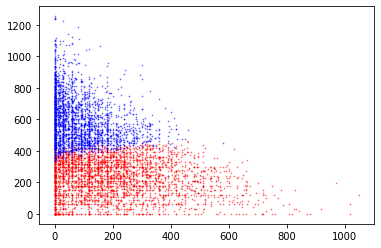

In [42]:
temp_df = df_19[df_19['t05']<5]

plt.cla
cluster0 = temp_df[temp_df['cluster_labels']==0]
cluster1 = temp_df[temp_df['cluster_labels']==1]
cluster2 = temp_df[temp_df['cluster_labels']==2]

plt.scatter(cluster0['t02'],cluster0['t12'],c='r',s=0.5,alpha=0.5)
plt.scatter(cluster2['t02'],cluster2['t12'],c='b',s=0.5,alpha=0.5)

# plt.scatter(cluster1['t02'],cluster1['t12'],c='g',s=0.5,alpha=0.5)


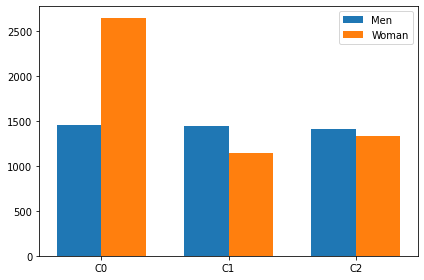

In [58]:
plt.cla

labels=['C0','C1','C2']

cluster0 = df_19[df_19['cluster_labels']==0]
cluster1 = df_19[df_19['cluster_labels']==1]
cluster2 = df_19[df_19['cluster_labels']==2]

men_cls0 = cluster0[cluster0['TESEX']==1]
women_cls0 = cluster0[cluster0['TESEX']==2]

men_cls1 = cluster1[cluster1['TESEX']==1]
women_cls1 = cluster1[cluster1['TESEX']==2]

men_cls2 = cluster2[cluster2['TESEX']==1]
women_cls2 = cluster2[cluster2['TESEX']==2]

num_men = [len(men_cls0),len(men_cls1),len(men_cls2)]
num_woman = [len(women_cls0),len(women_cls1),len(women_cls2)]




x = np.arange(len(labels))
width = 0.35

fig,ax = plt.subplots()
rects1 = ax.bar(x-width/2, num_men, width, label='Men')
rects2 = ax.bar(x+width/2, num_woman, width, label='Woman')
ax.set_xticks(x,labels)
ax.legend()
fig.tight_layout()

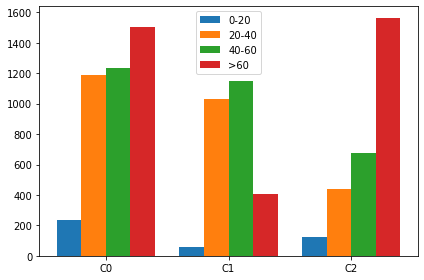

In [62]:
plt.cla

labels=['C0','C1','C2']

cluster0 = df_19[df_19['cluster_labels']==0]
cluster1 = df_19[df_19['cluster_labels']==1]
cluster2 = df_19[df_19['cluster_labels']==2]

a0_20_cls0 = cluster0[cluster0['TEAGE']<=20]
a20_40_cls0 = cluster0.loc[(cluster0['TEAGE']>20) & (cluster0['TEAGE']<=40)]
a40_60_cls0 = cluster0.loc[(cluster0['TEAGE']>40) & (cluster0['TEAGE'] <=60)]
a60_cls0 = cluster0[cluster0['TEAGE']>=60]

a0_20_cls1 = cluster1[cluster1['TEAGE']<=20]
a20_40_cls1 = cluster1.loc[(cluster1['TEAGE']>20) & (cluster1['TEAGE']<=40)]
a40_60_cls1 = cluster1.loc[(cluster1['TEAGE']>40) & (cluster1['TEAGE'] <=60)]
a60_cls1 = cluster1[cluster1['TEAGE']>=60]

a0_20_cls2 = cluster2[cluster2['TEAGE']<=20]
a20_40_cls2 = cluster2.loc[(cluster2['TEAGE']>20) & (cluster2['TEAGE']<=40)]
a40_60_cls2 = cluster2.loc[(cluster2['TEAGE']>40) & (cluster2['TEAGE'] <=60)]
a60_cls2 = cluster2[cluster2['TEAGE']>=60]

list_1 = [len(a0_20_cls0),len(a0_20_cls1),len(a0_20_cls2)]
list_2 = [len(a20_40_cls0),len(a20_40_cls1),len(a20_40_cls2)]
list_3 = [len(a40_60_cls0),len(a40_60_cls1),len(a40_60_cls2)]
list_4 = [len(a60_cls0),len(a60_cls1),len(a60_cls2)]


x = np.arange(len(labels))
width = 0.2

fig,ax = plt.subplots()
rects1 = ax.bar(x-width*3/2, list_1, width, label='0-20')
rects2 = ax.bar(x-width/2, list_2, width, label='20-40')
rects3 = ax.bar(x+width/2,list_3, width, label='40-60')
rects4 = ax.bar(x+3*width/2,list_4, width, label='>60')
ax.set_xticks(x,labels)
ax.legend()
fig.tight_layout()

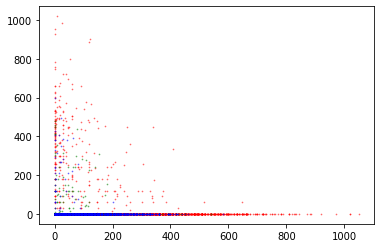

In [67]:
plt.cla
cluster0 = df_19[df_19['cluster_labels']==0]
cluster1 = df_19[df_19['cluster_labels']==1]
cluster2 = df_19[df_19['cluster_labels']==2]
# plt.scatter(cluster0['t01'],cluster0['t02'],c='r')
# plt.scatter(cluster1['t01'],cluster1['t02'],c='g')
# plt.scatter(cluster2['t01'],cluster2['t02'],c='b')

plt.scatter(cluster0['t02'],cluster0['t06'],c='r',s=0.5,alpha=0.5)
plt.scatter(cluster1['t02'],cluster1['t06'],c='g',s=0.5,alpha=0.5)
plt.scatter(cluster2['t02'],cluster2['t06'],c='b',s=0.5,alpha=0.5)

# plt.scatter(cluster0['pc1'],cluster0['pc2'],c='r')
# plt.scatter(cluster1['pc1'],cluster1['pc2'],c='g')
# plt.scatter(cluster2['pc1'],cluster2['pc2'],c='b')

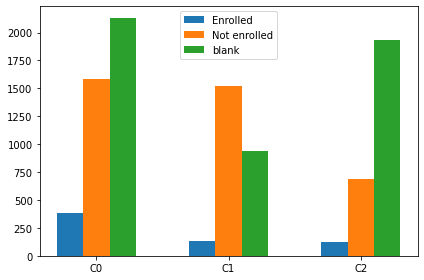

In [74]:
plt.cla

labels=['C0','C1','C2']

cluster0 = df_19[df_19['cluster_labels']==0]
cluster1 = df_19[df_19['cluster_labels']==1]
cluster2 = df_19[df_19['cluster_labels']==2]

yes_0 = cluster0[cluster0['TESCHENR']==1]
no_0 = cluster0[cluster0['TESCHENR']==2]
blk_0 = cluster0[cluster0['TESCHENR']==-1]

yes_1 = cluster1[cluster1['TESCHENR']==1]
no_1 = cluster1[cluster1['TESCHENR']==2]
blk_1 = cluster1[cluster1['TESCHENR']==-1]

yes_2 = cluster2[cluster2['TESCHENR']==1]
no_2 = cluster2[cluster2['TESCHENR']==2]
blk_2 = cluster2[cluster2['TESCHENR']==-1]

yesS = [len(yes_0),len(yes_1),len(yes_2)]
noS = [len(no_0),len(no_1),len(no_2)]
blkS = [len(blk_0),len(blk_1),len(blk_2)]




x = np.arange(len(labels))
width = 0.2

fig,ax = plt.subplots()
rects1 = ax.bar(x-width, yesS, width, label='Enrolled')
rects2 = ax.bar(x, noS, width, label='Not enrolled')
rects3 = ax.bar(x+width, blkS, width, label='blank')
ax.set_xticks(x,labels)
ax.legend()
fig.tight_layout()

In [75]:
len(cluster0.loc[(cluster0['TEAGE']>=49)])

2179

<h1> drawing pies for 2019</h1>

[2197, 448, 569, 416, 232, 95, 156]


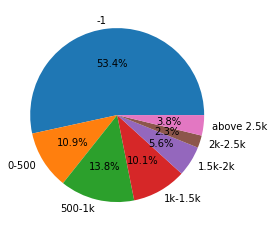

In [34]:
import matplotlib.pyplot as plt
cluster0 = df_19[df_19['cluster_labels']==0]
pieLabels = ['-1','0-500','500-1k','1k-1.5k','1.5k-2k','2k-2.5k','above 2.5k']
size = [len(cluster0.loc[(cluster0['TRERNWA']==-1)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=0)& (cluster0['TRERNWA']<5*1e4)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=5*1e4)& (cluster0['TRERNWA']<1*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1*1e5)& (cluster0['TRERNWA']<1.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1.5*1e5)& (cluster0['TRERNWA']<2*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2*1e5)& (cluster0['TRERNWA']<2.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2.5*1e5)])       
        ]

plt.pie(size,labels=pieLabels,autopct='%1.1f%%')
        

print(size)

[273, 436, 754, 477, 261, 168, 221]


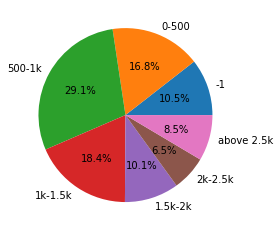

In [36]:
import matplotlib.pyplot as plt
cluster0 = df_19[df_19['cluster_labels']==1]
pieLabels = ['-1','0-500','500-1k','1k-1.5k','1.5k-2k','2k-2.5k','above 2.5k']
size = [len(cluster0.loc[(cluster0['TRERNWA']==-1)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=0)& (cluster0['TRERNWA']<5*1e4)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=5*1e4)& (cluster0['TRERNWA']<1*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1*1e5)& (cluster0['TRERNWA']<1.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1.5*1e5)& (cluster0['TRERNWA']<2*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2*1e5)& (cluster0['TRERNWA']<2.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2.5*1e5)])       
        ]

plt.pie(size,labels=pieLabels,autopct='%1.1f%%')
        

print(size)

[1862, 237, 284, 152, 87, 52, 58]


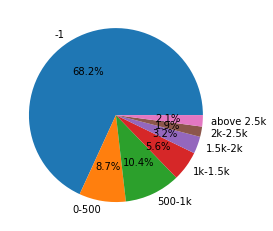

In [37]:
import matplotlib.pyplot as plt
cluster0 = df_19[df_19['cluster_labels']==2]
pieLabels = ['-1','0-500','500-1k','1k-1.5k','1.5k-2k','2k-2.5k','above 2.5k']
size = [len(cluster0.loc[(cluster0['TRERNWA']==-1)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=0)& (cluster0['TRERNWA']<5*1e4)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=5*1e4)& (cluster0['TRERNWA']<1*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1*1e5)& (cluster0['TRERNWA']<1.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1.5*1e5)& (cluster0['TRERNWA']<2*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2*1e5)& (cluster0['TRERNWA']<2.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2.5*1e5)])       
        ]

plt.pie(size,labels=pieLabels,autopct='%1.1f%%')
        

print(size)

<h1> analysis for 2021 </h1>

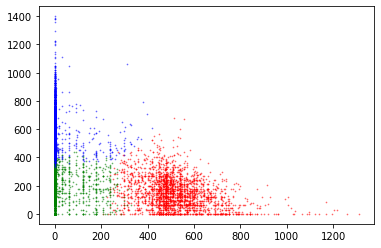

In [55]:
plt.cla
cluster0 = df_21[df_21['cluster_labels']==0]
cluster1 = df_21[df_21['cluster_labels']==1]
cluster2 = df_21[df_21['cluster_labels']==2]
# plt.scatter(cluster0['t01'],cluster0['t02'],c='r')
# plt.scatter(cluster1['t01'],cluster1['t02'],c='g')
# plt.scatter(cluster2['t01'],cluster2['t02'],c='b')

plt.scatter(cluster0['t05'],cluster0['t12'],c='r',s=0.5,alpha=0.5)
plt.scatter(cluster1['t05'],cluster1['t12'],c='g',s=0.5,alpha=0.5)
plt.scatter(cluster2['t05'],cluster2['t12'],c='b',s=0.5,alpha=0.5)

# plt.scatter(cluster0['pc1'],cluster0['pc2'],c='r')
# plt.scatter(cluster1['pc1'],cluster1['pc2'],c='g')
# plt.scatter(cluster2['pc1'],cluster2['pc2'],c='b')

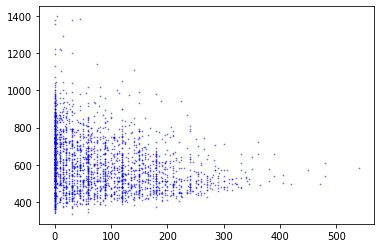

In [57]:
temp_df = df_21[df_21['t05']<5]

plt.cla
cluster0 = temp_df[temp_df['cluster_labels']==0]
cluster1 = temp_df[temp_df['cluster_labels']==1]
cluster2 = temp_df[temp_df['cluster_labels']==2]

plt.scatter(cluster0['t02'],cluster0['t12'],c='r',s=0.5,alpha=0.5)
plt.scatter(cluster2['t02'],cluster2['t12'],c='b',s=0.5,alpha=0.5)

# plt.scatter(cluster1['t02'],cluster1['t12'],c='g',s=0.5,alpha=0.5)

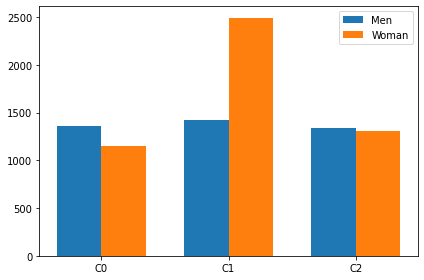

In [45]:
plt.cla

labels=['C0','C1','C2']

cluster0 = df_21[df_21['cluster_labels']==0]
cluster1 = df_21[df_21['cluster_labels']==1]
cluster2 = df_21[df_21['cluster_labels']==2]

men_cls0 = cluster0[cluster0['TESEX']==1]
women_cls0 = cluster0[cluster0['TESEX']==2]

men_cls1 = cluster1[cluster1['TESEX']==1]
women_cls1 = cluster1[cluster1['TESEX']==2]

men_cls2 = cluster2[cluster2['TESEX']==1]
women_cls2 = cluster2[cluster2['TESEX']==2]

num_men = [len(men_cls0),len(men_cls1),len(men_cls2)]
num_woman = [len(women_cls0),len(women_cls1),len(women_cls2)]




x = np.arange(len(labels))
width = 0.35

fig,ax = plt.subplots()
rects1 = ax.bar(x-width/2, num_men, width, label='Men')
rects2 = ax.bar(x+width/2, num_woman, width, label='Woman')
ax.set_xticks(x,labels)
ax.legend()
fig.tight_layout()

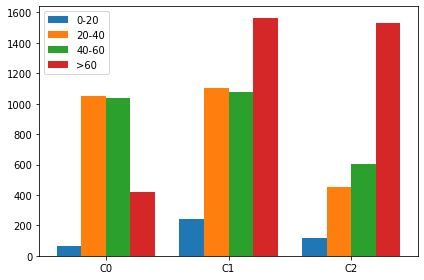

In [46]:
plt.cla

labels=['C0','C1','C2']

cluster0 = df_21[df_21['cluster_labels']==0]
cluster1 = df_21[df_21['cluster_labels']==1]
cluster2 = df_21[df_21['cluster_labels']==2]

a0_20_cls0 = cluster0[cluster0['TEAGE']<=20]
a20_40_cls0 = cluster0.loc[(cluster0['TEAGE']>20) & (cluster0['TEAGE']<=40)]
a40_60_cls0 = cluster0.loc[(cluster0['TEAGE']>40) & (cluster0['TEAGE'] <=60)]
a60_cls0 = cluster0[cluster0['TEAGE']>=60]

a0_20_cls1 = cluster1[cluster1['TEAGE']<=20]
a20_40_cls1 = cluster1.loc[(cluster1['TEAGE']>20) & (cluster1['TEAGE']<=40)]
a40_60_cls1 = cluster1.loc[(cluster1['TEAGE']>40) & (cluster1['TEAGE'] <=60)]
a60_cls1 = cluster1[cluster1['TEAGE']>=60]

a0_20_cls2 = cluster2[cluster2['TEAGE']<=20]
a20_40_cls2 = cluster2.loc[(cluster2['TEAGE']>20) & (cluster2['TEAGE']<=40)]
a40_60_cls2 = cluster2.loc[(cluster2['TEAGE']>40) & (cluster2['TEAGE'] <=60)]
a60_cls2 = cluster2[cluster2['TEAGE']>=60]

list_1 = [len(a0_20_cls0),len(a0_20_cls1),len(a0_20_cls2)]
list_2 = [len(a20_40_cls0),len(a20_40_cls1),len(a20_40_cls2)]
list_3 = [len(a40_60_cls0),len(a40_60_cls1),len(a40_60_cls2)]
list_4 = [len(a60_cls0),len(a60_cls1),len(a60_cls2)]


x = np.arange(len(labels))
width = 0.2

fig,ax = plt.subplots()
rects1 = ax.bar(x-width*3/2, list_1, width, label='0-20')
rects2 = ax.bar(x-width/2, list_2, width, label='20-40')
rects3 = ax.bar(x+width/2,list_3, width, label='40-60')
rects4 = ax.bar(x+3*width/2,list_4, width, label='>60')
ax.set_xticks(x,labels)
ax.legend()
fig.tight_layout()

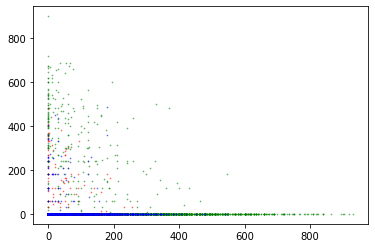

In [47]:
plt.cla
cluster0 = df_21[df_21['cluster_labels']==0]
cluster1 = df_21[df_21['cluster_labels']==1]
cluster2 = df_21[df_21['cluster_labels']==2]
# plt.scatter(cluster0['t01'],cluster0['t02'],c='r')
# plt.scatter(cluster1['t01'],cluster1['t02'],c='g')
# plt.scatter(cluster2['t01'],cluster2['t02'],c='b')

plt.scatter(cluster0['t02'],cluster0['t06'],c='r',s=0.5,alpha=0.5)
plt.scatter(cluster1['t02'],cluster1['t06'],c='g',s=0.5,alpha=0.5)
plt.scatter(cluster2['t02'],cluster2['t06'],c='b',s=0.5,alpha=0.5)

# plt.scatter(cluster0['pc1'],cluster0['pc2'],c='r')
# plt.scatter(cluster1['pc1'],cluster1['pc2'],c='g')
# plt.scatter(cluster2['pc1'],cluster2['pc2'],c='b')

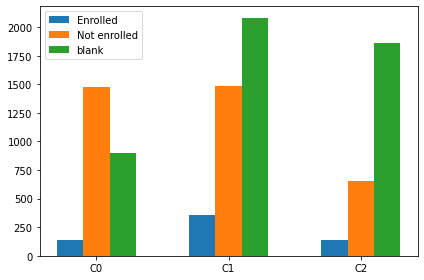

In [48]:
plt.cla

labels=['C0','C1','C2']

cluster0 = df_21[df_21['cluster_labels']==0]
cluster1 = df_21[df_21['cluster_labels']==1]
cluster2 = df_21[df_21['cluster_labels']==2]

yes_0 = cluster0[cluster0['TESCHENR']==1]
no_0 = cluster0[cluster0['TESCHENR']==2]
blk_0 = cluster0[cluster0['TESCHENR']==-1]

yes_1 = cluster1[cluster1['TESCHENR']==1]
no_1 = cluster1[cluster1['TESCHENR']==2]
blk_1 = cluster1[cluster1['TESCHENR']==-1]

yes_2 = cluster2[cluster2['TESCHENR']==1]
no_2 = cluster2[cluster2['TESCHENR']==2]
blk_2 = cluster2[cluster2['TESCHENR']==-1]

yesS = [len(yes_0),len(yes_1),len(yes_2)]
noS = [len(no_0),len(no_1),len(no_2)]
blkS = [len(blk_0),len(blk_1),len(blk_2)]




x = np.arange(len(labels))
width = 0.2

fig,ax = plt.subplots()
rects1 = ax.bar(x-width, yesS, width, label='Enrolled')
rects2 = ax.bar(x, noS, width, label='Not enrolled')
rects3 = ax.bar(x+width, blkS, width, label='blank')
ax.set_xticks(x,labels)
ax.legend()
fig.tight_layout()

[256, 318, 709, 535, 255, 162, 282]


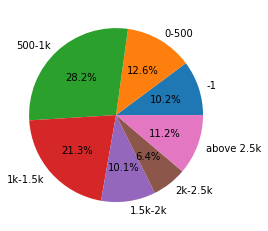

In [49]:
import matplotlib.pyplot as plt
cluster0 = df_21[df_21['cluster_labels']==0]
pieLabels = ['-1','0-500','500-1k','1k-1.5k','1.5k-2k','2k-2.5k','above 2.5k']
size = [len(cluster0.loc[(cluster0['TRERNWA']==-1)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=0)& (cluster0['TRERNWA']<5*1e4)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=5*1e4)& (cluster0['TRERNWA']<1*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1*1e5)& (cluster0['TRERNWA']<1.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1.5*1e5)& (cluster0['TRERNWA']<2*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2*1e5)& (cluster0['TRERNWA']<2.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2.5*1e5)])       
        ]

plt.pie(size,labels=pieLabels,autopct='%1.1f%%')
        

print(size)

[2252, 376, 463, 365, 178, 114, 169]


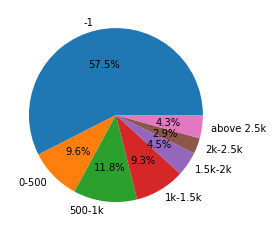

In [50]:
import matplotlib.pyplot as plt
cluster0 = df_21[df_21['cluster_labels']==1]
pieLabels = ['-1','0-500','500-1k','1k-1.5k','1.5k-2k','2k-2.5k','above 2.5k']
size = [len(cluster0.loc[(cluster0['TRERNWA']==-1)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=0)& (cluster0['TRERNWA']<5*1e4)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=5*1e4)& (cluster0['TRERNWA']<1*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1*1e5)& (cluster0['TRERNWA']<1.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1.5*1e5)& (cluster0['TRERNWA']<2*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2*1e5)& (cluster0['TRERNWA']<2.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2.5*1e5)])       
        ]

plt.pie(size,labels=pieLabels,autopct='%1.1f%%')
        

print(size)

[1818, 173, 267, 170, 94, 34, 97]


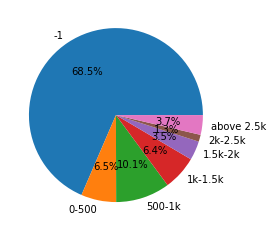

In [51]:
import matplotlib.pyplot as plt
cluster0 = df_21[df_21['cluster_labels']==2]
pieLabels = ['-1','0-500','500-1k','1k-1.5k','1.5k-2k','2k-2.5k','above 2.5k']
size = [len(cluster0.loc[(cluster0['TRERNWA']==-1)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=0)& (cluster0['TRERNWA']<5*1e4)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=5*1e4)& (cluster0['TRERNWA']<1*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1*1e5)& (cluster0['TRERNWA']<1.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=1.5*1e5)& (cluster0['TRERNWA']<2*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2*1e5)& (cluster0['TRERNWA']<2.5*1e5)]),
        len(cluster0.loc[(cluster0['TRERNWA']>=2.5*1e5)])       
        ]

plt.pie(size,labels=pieLabels,autopct='%1.1f%%')
        

print(size)